In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)

pesquisa2021 = pd.read_csv('Datasets/Salario2021.csv')
genero =  pesquisa2021["('P1_b ', 'Genero')"]
estado =  pesquisa2021["('P1_e ', 'Estado onde mora')"]

In [3]:
pesquisa2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 356 entries, ('P0', 'id') to ('P9_a_g ', 'Ainda não conhecia o Data Hackers')
dtypes: float64(293), int64(7), object(56)
memory usage: 7.2+ MB


In [4]:
df = pesquisa2021 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 356 entries, ('P0', 'id') to ('P9_a_g ', 'Ainda não conhecia o Data Hackers')
dtypes: float64(293), int64(7), object(56)
memory usage: 7.2+ MB


In [5]:
colunas_selecionadas = ["('P1_b ', 'Genero')",
"('P1_e_a ', 'uf onde mora')",
"('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_c ', 'Mudou de Estado?')",
"('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')",
 "('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')",
 "('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')",
 "('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')",                   
]

colunas_renomeadas = [
'genero', 
'uf', 
'regiao_mora',
 'mudou_estado',
'situacao_trabalho',
 'nivel',
 'faixa_salarial',
 'xp_dados',
 'linguagens_utilizadas',
'banco_dados_utilizados',
 'cloud_utilizadas',
 'ferramentas_bi_utilizadas',
]

trabalham = ['Empreendedor ou Empregado (CNPJ)',
 'Empregado (CLT)',
 'Estagiário',
 'Freelancer',
 'Servidor Público',
 'Trabalho na área Acadêmica/Pesquisador',
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)']


pesquisa2021 = pd.read_csv('Datasets/Salario2021.csv',usecols=colunas_selecionadas)
#pesquisa2021 = pd.read_csv('State of Data 2021 - Dataset - Pgina1.csv')

In [6]:
#renomeando colunas
pesquisa2021.columns = colunas_renomeadas


#Removendo profissioanais que se consideram desempregados, apenas estudantes ...
pesquisa2021 = pesquisa2021[pesquisa2021["situacao_trabalho"].isin(trabalham)].reset_index(drop=True)

#Removendo profissionais que trabalham no exterior:
pesquisa2021 = pesquisa2021[pesquisa2021["regiao_mora"] != 'Exterior'].reset_index(drop=True)


print(f'Quantidade de registros:  {len(pesquisa2021)}')

Quantidade de registros:  2360


In [7]:
pesquisa2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   genero                     2360 non-null   object
 1   uf                         2333 non-null   object
 2   regiao_mora                2360 non-null   object
 3   mudou_estado               2360 non-null   int64 
 4   situacao_trabalho          2360 non-null   object
 5   nivel                      1819 non-null   object
 6   faixa_salarial             2318 non-null   object
 7   xp_dados                   2318 non-null   object
 8   linguagens_utilizadas      1819 non-null   object
 9   banco_dados_utilizados     1818 non-null   object
 10  cloud_utilizadas           1817 non-null   object
 11  ferramentas_bi_utilizadas  1817 non-null   object
dtypes: int64(1), object(11)
memory usage: 221.4+ KB


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Removendo linhas em que o gênero é igual a "outro"
pesquisa2021 = pesquisa2021[pesquisa2021['genero'] != "Outro"]
df1 = pesquisa2021['genero'].value_counts() #df1 - quantidades masculinas e femininas 


In [10]:
#ax = df1.plot.barh()
pesquisa2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 0 to 2359
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   genero                     2357 non-null   object
 1   uf                         2330 non-null   object
 2   regiao_mora                2357 non-null   object
 3   mudou_estado               2357 non-null   int64 
 4   situacao_trabalho          2357 non-null   object
 5   nivel                      1816 non-null   object
 6   faixa_salarial             2315 non-null   object
 7   xp_dados                   2315 non-null   object
 8   linguagens_utilizadas      1816 non-null   object
 9   banco_dados_utilizados     1815 non-null   object
 10  cloud_utilizadas           1814 non-null   object
 11  ferramentas_bi_utilizadas  1814 non-null   object
dtypes: int64(1), object(11)
memory usage: 239.4+ KB


([<matplotlib.patches.Wedge at 0x1f059b12610>,
 [Text(-0.9569876475015703, 0.637710469201667, 'Masculino'),
  Text(0.9569876176481875, -0.6377105140014914, 'Feminino')])

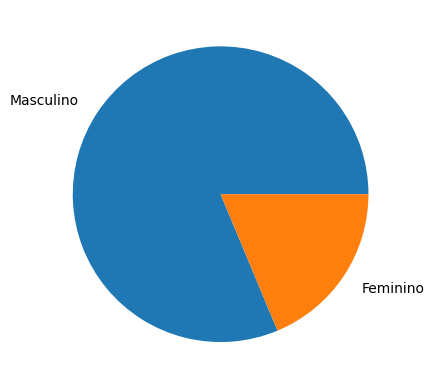

In [11]:

plt.pie(df1,labels = ['Masculino','Feminino'],labeldistance=1.15)

In [12]:
df1 = pesquisa2021['faixa_salarial'].value_counts()
df3 = pesquisa2021['faixa_salarial'].value_counts()

In [14]:
import matplotlib.pyplot as plt
regiao = pesquisa2021.groupby(['regiao_mora']).value_counts()

In [15]:
df5 = pesquisa2021['uf'].value_counts()

In [16]:
df = df.rename(columns=({
"('P4_f_a ', 'MySQL')"                        : "MySQL",
"('P4_f_b ', 'Oracle')"                       : "Oracle",
"('P4_f_c ', 'SQL SERVER')"                   : "SQL SERVER",
"('P4_f_d ', 'SAP')"                          : "SAP",
"('P4_f_e ', 'Amazon Aurora ou RDS')"         : "Amazon Aurora ou RDS",
"('P4_f_f ', 'Amazon DynamoDB')"              : "Amazon DynamoDB",
"('P4_f_g ', 'CoachDB')"                      : "CoachDB",
"('P4_f_h ', 'Cassandra')"                    : "Cassandra",
"('P4_f_i ', 'MongoDB')"                      : "MongoDB",
"('P4_f_j ', 'MariaDB')"                      : "MariaDB",
"('P4_f_k ', 'Datomic')"                      : "Datomic",
"('P4_f_l ', 'S3')"                           : "S3",
"('P4_f_m ', 'PostgreSQL')"                   : "PostgreSQL",
"('P4_f_n ', 'ElasticSearch')"                : "ElasticSearch",
"('P4_f_o ', 'DB2')"                          : "DB2",
"('P4_f_p ', 'Microsoft Access')"             : "Microsoft Access",
"('P4_f_q ', 'SQLite')"                       : "SQLite",
"('P4_f_r ', 'Sybase')"                       : "Sybase",
"('P4_f_s ', 'Firebase')"                     : "Firebase",
"('P4_f_t ', 'Vertica')"                      : "Vertica",
"('P4_f_u ', 'Redis')"                        : "Redis",
"('P4_f_v ', 'Neo4J')"                        : "Neo4J",
"('P4_f_x ', 'Google BigQuery')"              : "Google BigQuery",
"('P4_f_y ', 'Google Firestore')"             : "Google Firestore",
"('P4_f_z ', 'Amazon Redshift')"              : "Amazon Redshift",
"('P4_f_z1 ', 'Amazon Athena')"               : "Amazon Athena",
"('P4_f_z2 ', 'Snowflake')"                   : "Snowflake",
"('P4_f_z3 ', 'Databricks')"                  : "Databricks",
"('P4_f_z4 ', 'HBase')"                       : "HBase",
"('P4_f_z5 ', 'Presto')"                      : "Presto",
"('P4_f_z6 ', 'Splunk')"                      : "Splunk",
"('P4_f_z7 ', 'SAP HANA')"                    : "SAP HANA",
"('P4_f_z8 ', 'Hive')"                        : "Hive",
"('P4_f_z9 ', 'Firebird')"                    : "Firebird"}))

In [17]:
tab = pd.concat(
[pd.crosstab(index=pesquisa2021["genero"], columns = 'count').transpose(),
pd.crosstab(index=pesquisa2021["genero"], columns = 'count',normalize=True).transpose()*100]).T

In [18]:
df_regiao = pesquisa2021.groupby('regiao_mora').count()


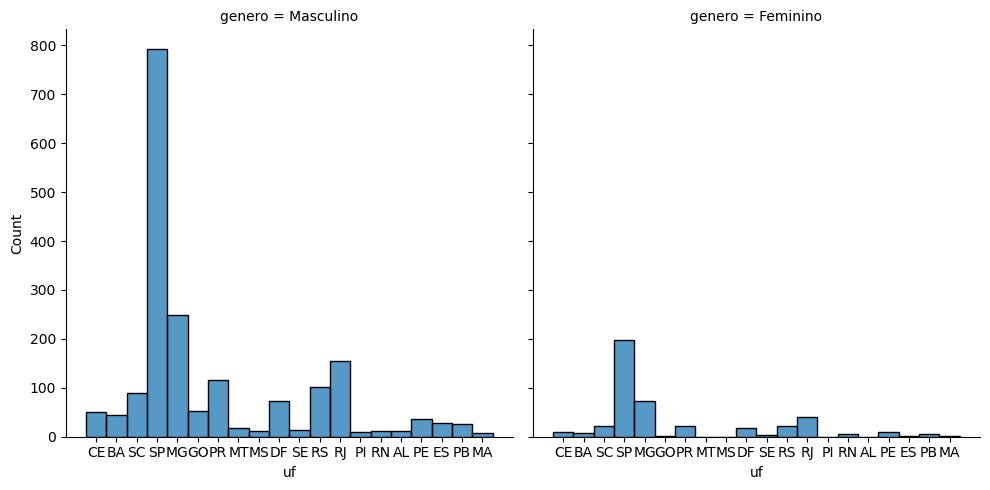

In [19]:
sns.displot(x = 'uf',col="genero",data = pesquisa2021) #stat='probability'

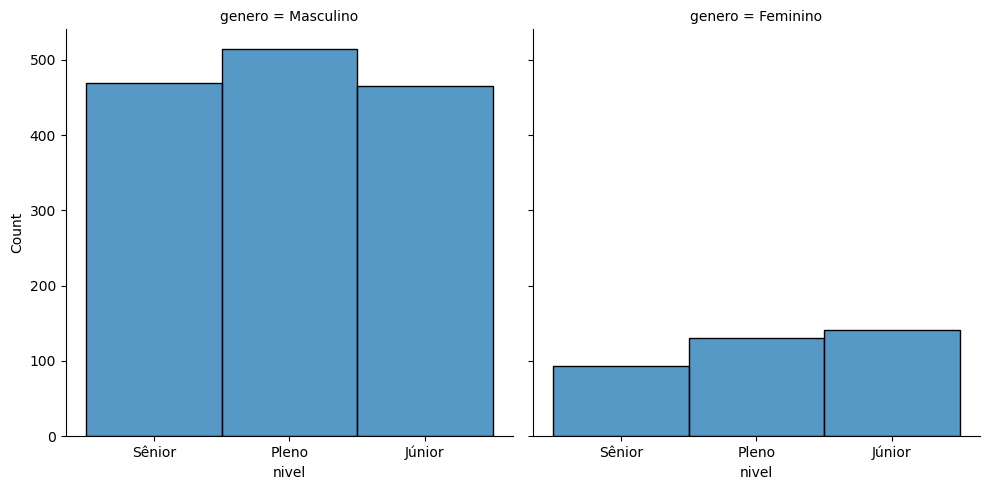

In [20]:
pesquisa2021.nivel.value_counts()
df1 = pesquisa2021.groupby(['genero','nivel'])
sns.displot(x = 'nivel', col="genero", data = pesquisa2021)

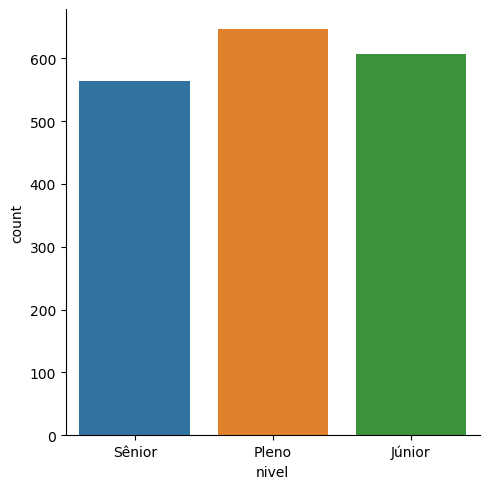

In [21]:
sns.catplot(x = 'nivel', kind = 'count', data = pesquisa2021)

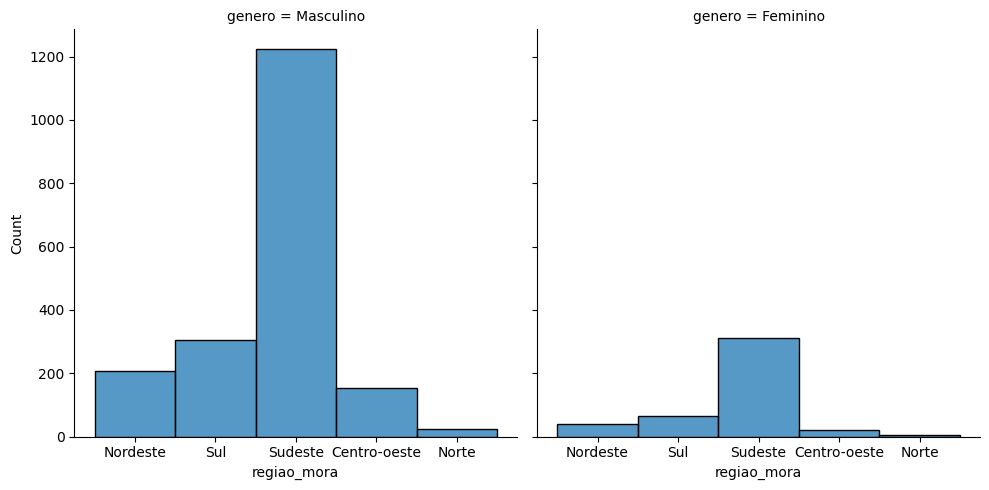

In [22]:
sns.displot(x = 'regiao_mora',col="genero",data = pesquisa2021) #stat='probability'

In [23]:
display(pesquisa2021)

,genero,uf,regiao_mora,mudou_estado,situacao_trabalho,nivel,faixa_salarial,xp_dados,linguagens_utilizadas,banco_dados_utilizados,cloud_utilizadas,ferramentas_bi_utilizadas
0,Masculino,CE,Nordeste,0,Empregado (CLT),NaN,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,NaN,NaN,NaN,NaN
1,Masculino,BA,Nordeste,1,Empreendedor ou Empregado (CNPJ),NaN,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,NaN,NaN,NaN,NaN
2,Masculino,SC,Sul,0,Empregado (CLT),NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,NaN,NaN,NaN,NaN
3,Feminino,SP,Sudeste,0,Empreendedor ou Empregado (CNPJ),NaN,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,NaN,NaN,NaN,NaN
4,Masculino,SC,Sul,0,Empreendedor ou Empregado (CNPJ),NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2355,Masculino,NaN,Norte,0,Servidor Público,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 6 a 10 anos,"SQL, Python, C/C++/C#, Java, PHP, JavaScript","MySQL, Oracle, SQL SERVER, SQLite",Cloud Própria,Metabase
2356,Masculino,SC,Sul,1,Empreendedor ou Empregado (CNPJ),Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,"SQL, Python, R","PostgreSQL, Google BigQuery",Google Cloud (GCP),"Google Data Studio, Qlik View/Qlik Sense"
2357,Masculino,SP,Sudeste,1,Trabalho na área Acadêmica/Pesquisador,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2358,Masculino,SC,Sul,1,Empregado (CLT),Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 4 a 5 anos,"SQL, R, Python","Redis, DynamoDB, PostgreSQL","Amazon Web Services (AWS), Google Cloud (GCP)",Redash


In [24]:
pesquisa2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 0 to 2359
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   genero                     2357 non-null   object
 1   uf                         2330 non-null   object
 2   regiao_mora                2357 non-null   object
 3   mudou_estado               2357 non-null   int64 
 4   situacao_trabalho          2357 non-null   object
 5   nivel                      1816 non-null   object
 6   faixa_salarial             2315 non-null   object
 7   xp_dados                   2315 non-null   object
 8   linguagens_utilizadas      1816 non-null   object
 9   banco_dados_utilizados     1815 non-null   object
 10  cloud_utilizadas           1814 non-null   object
 11  ferramentas_bi_utilizadas  1814 non-null   object
dtypes: int64(1), object(11)
memory usage: 303.9+ KB


In [25]:
from datamatrix import operations as ops

ModuleNotFoundError: No module named 'datamatrix'

In [26]:
df101 = pesquisa2021.groupby(['nivel'])['genero','uf','faixa_salarial'].value_counts()

In [27]:
df101.head(50)

nivel   genero     uf  faixa_salarial                 
Júnior  Masculino  SP  de R$ 4.001/mês a R$ 6.000/mês     47
                       de R$ 2.001/mês a R$ 3000/mês      40
                       de R$ 1.001/mês a R$ 2.000/mês     34
                       de R$ 3.001/mês a R$ 4.000/mês     29
        Feminino   SP  de R$ 2.001/mês a R$ 3000/mês      18
        Masculino  MG  de R$ 2.001/mês a R$ 3000/mês      18
                       de R$ 1.001/mês a R$ 2.000/mês     16
                   SP  de R$ 6.001/mês a R$ 8.000/mês     15
                   MG  de R$ 3.001/mês a R$ 4.000/mês     14
        Feminino   SP  de R$ 4.001/mês a R$ 6.000/mês     14
        Masculino  RJ  de R$ 4.001/mês a R$ 6.000/mês     12
        Feminino   SP  de R$ 3.001/mês a R$ 4.000/mês     11
        Masculino  MG  de R$ 4.001/mês a R$ 6.000/mês     10
        Feminino   MG  de R$ 2.001/mês a R$ 3000/mês      10
        Masculino  RJ  de R$ 2.001/mês a R$ 3000/mês       9
                   PR  de R$ 4

In [28]:
qtd = pesquisa2021['regiao_mora'].value_counts().values
idx = pesquisa2021['regiao_mora'].value_counts().index

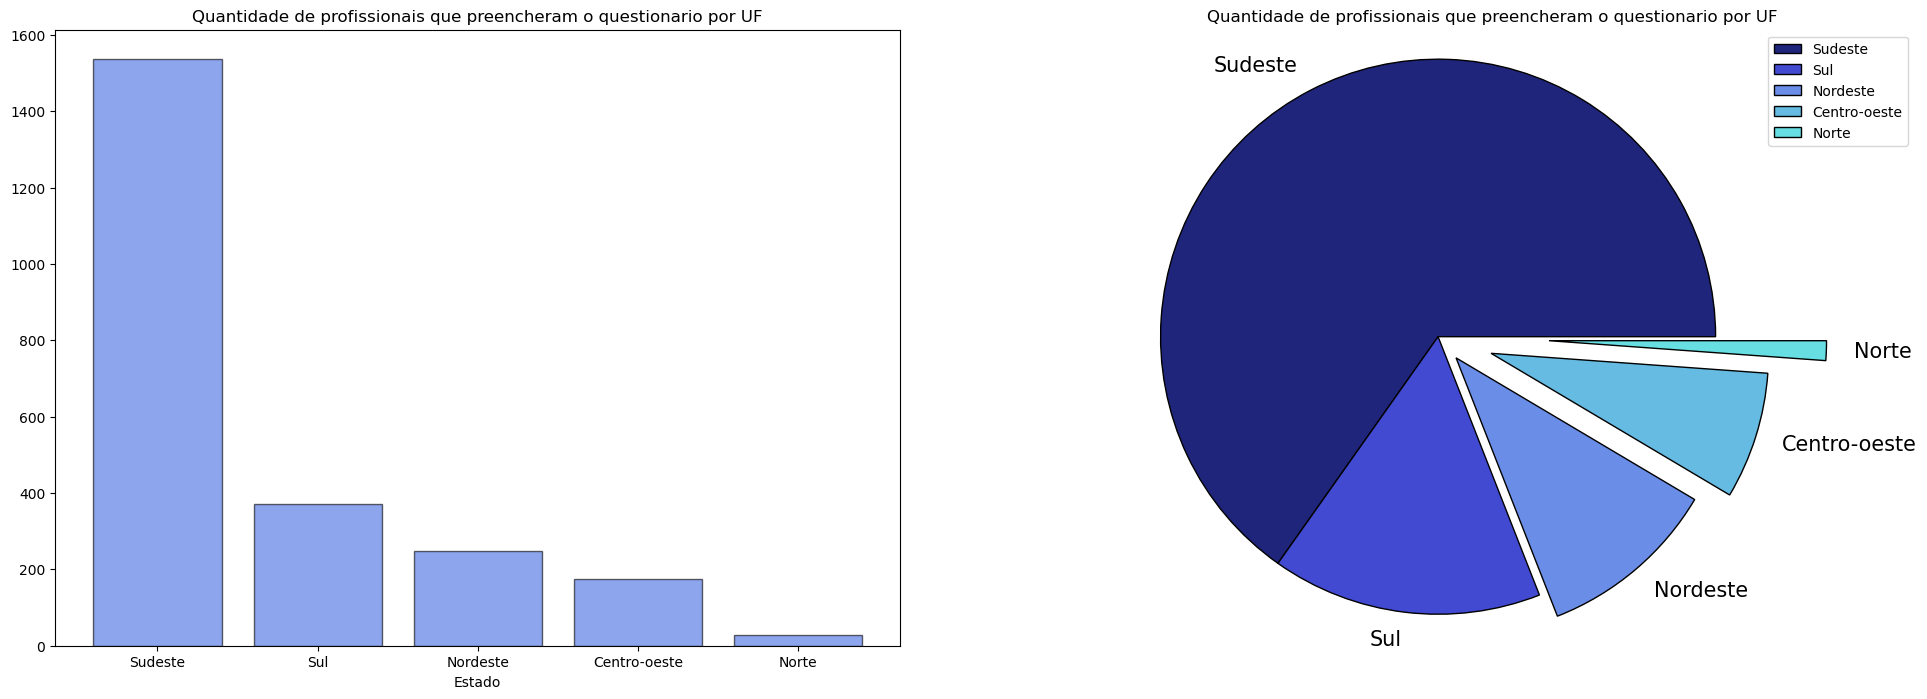

In [29]:
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(idx, qtd, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel('Estado')
plt.title("Quantidade de profissionais que preencheram o questionario por UF")
plt.subplot(1, 2, 2)
plt.pie(qtd, 
        labels = list(idx),  
        colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2"],
        labeldistance = 1.1,
        explode = [0, 0, .1, .2, .4],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Quantidade de profissionais que preencheram o questionario por UF")
plt.legend()